# Fraud Detection

EDA on a fraud detection dataset, with statistical validation and actionable business insights.

#### 1) Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2) Data Overview:

##### 1) Data Loading:

In [2]:
df= pd.read_csv('FraudDetection_final.csv')

In [3]:
df.head()

,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,device_type,location,merchant_category,account_age_days,num_prev_transactions,avg_transaction_amount,is_international,is_high_risk_country,failed_login_attempts,card_present,fraud
0,1,4174,180.35,Online Purchase,2023-01-01 00:00:00,Mobile,Rural,Travel,1753.0,441,239.66,0,0,3.0,0,0
1,2,4507,105.99,ATM Withdrawal,2023-01-01 01:00:00,Desktop,Urban,Electronics,1654.0,260,75.80,0,0,2.0,0,0
2,3,1860,NaN,ATM Withdrawal,2023-01-01 02:00:00,Mobile,Suburban,Clothing,445.0,332,215.77,0,0,4.0,0,0
3,4,2294,NaN,Online Purchase,2023-01-01 03:00:00,Desktop,Urban,Electronics,348.0,231,180.20,0,0,NaN,0,0
4,5,2130,194.96,Online Purchase,2023-01-01 04:00:00,Mobile,Urban,Clothing,NaN,247,57.90,0,0,NaN,0,0


In [4]:
df.tail()

,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,device_type,location,merchant_category,account_age_days,num_prev_transactions,avg_transaction_amount,is_international,is_high_risk_country,failed_login_attempts,card_present,fraud
7995,7996,2576,116.15,Online Purchase,2023-11-30 03:00:00,Tablet,Urban,Travel,308.0,473,34.12,0,0,2.0,0,0
7996,7997,1335,58.22,Online Purchase,2023-11-30 04:00:00,Mobile,Urban,NaN,803.0,195,176.79,0,0,4.0,0,0
7997,7998,3209,273.65,POS Purchase,2023-11-30 05:00:00,Mobile,Rural,Clothing,882.0,271,88.02,0,0,2.0,0,1
7998,7999,4231,201.13,Transfer,2023-11-30 06:00:00,Mobile,Urban,Clothing,1563.0,472,64.67,0,0,2.0,0,0
7999,8000,2497,296.15,Transfer,2023-11-30 07:00:00,Mobile,Urban,Electronics,460.0,466,43.79,0,0,NaN,0,0


##### 2) Data Overview:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          8000 non-null   int64  
 1   customer_id             8000 non-null   int64  
 2   transaction_amount      7600 non-null   float64
 3   transaction_type        8000 non-null   object 
 4   transaction_time        8000 non-null   object 
 5   device_type             7840 non-null   object 
 6   location                8000 non-null   object 
 7   merchant_category       7760 non-null   object 
 8   account_age_days        7360 non-null   float64
 9   num_prev_transactions   8000 non-null   int64  
 10  avg_transaction_amount  8000 non-null   float64
 11  is_international        8000 non-null   int64  
 12  is_high_risk_country    8000 non-null   int64  
 13  failed_login_attempts   7200 non-null   float64
 14  card_present            8000 non-null   

As can be seen here,
- Several Columns, 'transaction_amount', 'device_type', 'merchant_category', 'account_age_days' and 'failed_login_attempts' have some Missing Values.
- 'transaction_time' column is stored as object datatype instead of datetime datatype.

###### Converting Transaction Time Column to Date-Time Data Type:

In [6]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          8000 non-null   int64         
 1   customer_id             8000 non-null   int64         
 2   transaction_amount      7600 non-null   float64       
 3   transaction_type        8000 non-null   object        
 4   transaction_time        8000 non-null   datetime64[ns]
 5   device_type             7840 non-null   object        
 6   location                8000 non-null   object        
 7   merchant_category       7760 non-null   object        
 8   account_age_days        7360 non-null   float64       
 9   num_prev_transactions   8000 non-null   int64         
 10  avg_transaction_amount  8000 non-null   float64       
 11  is_international        8000 non-null   int64         
 12  is_high_risk_country    8000 non-null   int64   

df.head()

In [8]:
df.shape

(8000, 16)

In Data, we have
- 16 Features (Columns) and 8000 Records.
- Some of the Columns have Missing Values, which we will handle in next Step.

#### 3) Data Cleaning:

##### 1) handling Missing Values:

In [9]:
# Number of Missing Values:

df.isnull().sum()

transaction_id              0
customer_id                 0
transaction_amount        400
transaction_type            0
transaction_time            0
device_type               160
location                    0
merchant_category         240
account_age_days          640
num_prev_transactions       0
avg_transaction_amount      0
is_international            0
is_high_risk_country        0
failed_login_attempts     800
card_present                0
fraud                       0
dtype: int64

In [10]:
# Percentage of Missing Values:

df.isnull().sum() / len(df) * 100

transaction_id             0.0
customer_id                0.0
transaction_amount         5.0
transaction_type           0.0
transaction_time           0.0
device_type                2.0
location                   0.0
merchant_category          3.0
account_age_days           8.0
num_prev_transactions      0.0
avg_transaction_amount     0.0
is_international           0.0
is_high_risk_country       0.0
failed_login_attempts     10.0
card_present               0.0
fraud                      0.0
dtype: float64

###### Transactrion Amount:

In [11]:
df['transaction_amount']

0       180.35
1       105.99
2          NaN
3          NaN
4       194.96
         ...  
7995    116.15
7996     58.22
7997    273.65
7998    201.13
7999    296.15
Name: transaction_amount, Length: 8000, dtype: float64

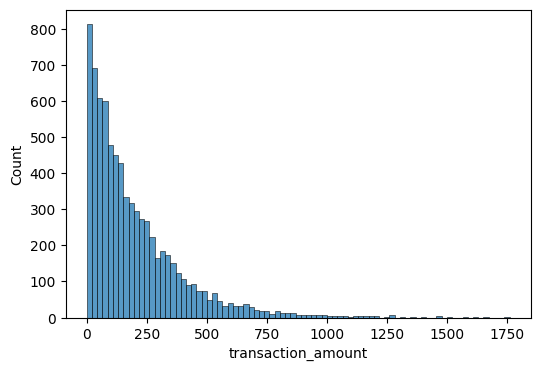

In [12]:
plt.figure(figsize= (6,4))
sns.histplot(data= df, x= 'transaction_amount')
plt.show()

In [13]:
df['transaction_amount'].describe()

count    7600.000000
mean      198.682061
std       200.271409
min         0.040000
25%        58.732500
50%       138.630000
75%       274.302500
max      1759.970000
Name: transaction_amount, dtype: float64

As we can see, Transaction Amount has Right Tailed Distribution.
Simplest method for Missing Value Imputation here would be Median Imputation.
As we have Average Transaction Amount For Each user too, We can Use that to Fill Missing Transaction Amounts too.

Strategy for Missing Value Imutation in Transaction Amount:
- Average Transaction Amount if Available,
- Group Median Considering Merchant Category and Device Type,
- Global Median.

In [14]:
def transaction_amount_imputation(row):
    """
    Imputes Missing Transaction Amount Based on:
    1) Average Transaction Amount if available or
    2) Group Median Considering Merchant Category and Device Type or
    3) Global Median
    """

    if not pd.isnull(row['transaction_amount']):
        return row['transaction_amount']

    if not pd.isnull(row['avg_transaction_amount']):
        return row['avg_transaction_amount']

    mask = (
        (df['merchant_category'] == row['merchant_category']) &
        (df['device_type'] == row['device_type'])
    )
    median_value = df.loc[mask, 'transaction_amount'].median()

    if not np.isnan(median_value):
        return median_value

    return df['trasaction_amount'].median()

In [15]:
df['transaction_amount'] = df.apply(transaction_amount_imputation, axis= 1)

In [16]:
df['transaction_amount'].isnull().sum()

0

###### Device Type:

In [17]:
df['device_type']

0        Mobile
1       Desktop
2        Mobile
3       Desktop
4        Mobile
         ...   
7995     Tablet
7996     Mobile
7997     Mobile
7998     Mobile
7999     Mobile
Name: device_type, Length: 8000, dtype: object

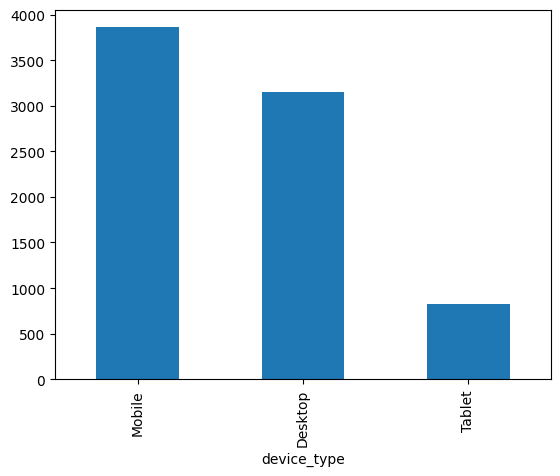

In [18]:
df['device_type'].value_counts().plot(kind= 'bar')
plt.show()

As Device Type is a Categorical Feature, Simplest Way of Missing Value Imputation is Mode Imputation.

Strategy For Missing Value imputation on Device Type:
- User Level Mode,
- Merchant Level Mode,
- Global Mode.

In [19]:
def device_type_imputation(df):
    """
    Imputes Missing Device Type Based on:
    1) User Level Mode or,
    2) Merchant Level Mode or,
    3) Global Mode
    """

    
    user_modes = df.groupby('customer_id')['device_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['device_type'] = df['device_type'].fillna(df['customer_id'].map(user_modes.to_dict()))
    
    # --- Step 2: Merchant-level mode ---
    if df['device_type'].isnull().sum() > 0:
        merchant_modes = df.groupby('merchant_category')['device_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        df['device_type'] = df['device_type'].fillna(df['merchant_category'].map(merchant_modes.to_dict()))
    
    # --- Step 3: Global mode ---
    if df['device_type'].isnull().sum() > 0:
        global_mode = df['device_type'].mode()[0]
        df['device_type'].fillna(global_mode, inplace=True)
    
    return df

In [20]:
df = device_type_imputation(df)

In [21]:
df['device_type'].isnull().sum()

0